# Phase 3 Data Science Report

## Exploratory Data Analysis

In [13]:
import keras_tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [15]:
# read in all the batches
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [16]:
# convert the batches to dataframes
df1 = pd.DataFrame(batch1[b'data'])
df2 = pd.DataFrame(batch2[b'data'])
df3 = pd.DataFrame(batch3[b'data'])
df4 = pd.DataFrame(batch4[b'data'])
df5 = pd.DataFrame(batch5[b'data'])
test_df = pd.DataFrame(test_batch[b'data'])

In [17]:
# print the shape of each dataframe
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(test_df.shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [18]:
# combine the dataframes into one
df_combined = pd.concat([df1, df2, df3, df4, df5])

In [19]:
# reshape df_combined to 32x32x3
df_combined = df_combined.values.reshape(-1, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [20]:
# combine all the labels into one
labels = np.concatenate([batch1[b'labels'], batch2[b'labels'], batch3[b'labels'], batch4[b'labels'], batch5[b'labels']])


In [21]:
# make a new dataframe with the labels
df_labels = pd.DataFrame(labels)
df_labels['labels'] = labels
df_labels['image'] = df_combined

In [22]:
# make a dictionary with the key being the label of the image and the value being the index of the image from df
label_dict = {}
for i in range(len(df_labels)):
    if df_labels['labels'][i] in label_dict:
        label_dict[df_labels['labels'][i]].append(i)
    else:
        label_dict[df_labels['labels'][i]] = [i]



In [23]:
# sort dictionary by key
label_dict = dict(sorted(label_dict.items()))


Label:  0


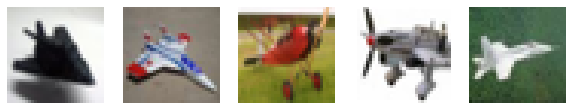

Label:  1


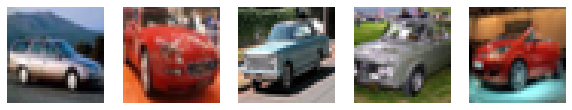

Label:  2


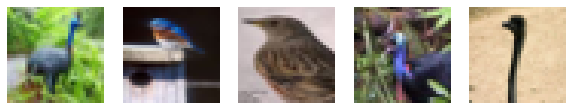

Label:  3


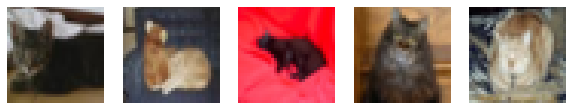

Label:  4


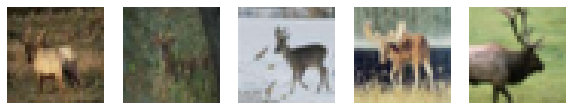

Label:  5


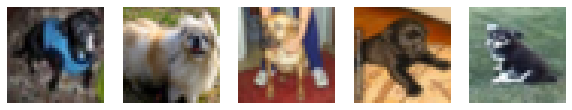

Label:  6


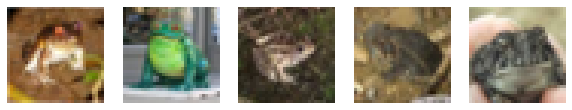

Label:  7


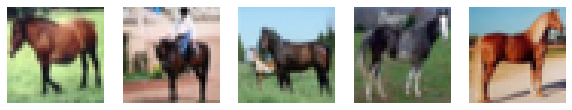

Label:  8


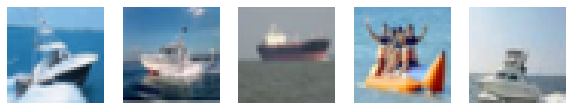

Label:  9


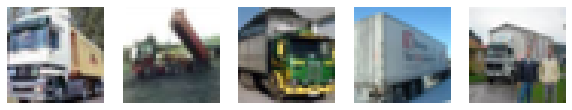

In [24]:
# render the 5 images for each key in the dictionary
for key in label_dict:
    plt.figure(figsize=(10,10))
    print("Label: ", key)
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(df_combined[label_dict[key][i]])
        plt.axis('off')
    plt.show()

### Decided to pick label 5 which is a dog

## Data Processing

In [25]:
# check how many values in the dataframe
df_labels.shape


(50000, 3)

In [26]:
# get the indexs of all the images with label 5
dog_index = []
for i in range(len(df_labels)):
    if df_labels['labels'][i] == 5:
        dog_index.append(i)

In [27]:
# create new empty dataframe
df_dog = pd.DataFrame()

In [28]:
# add the images with label 5 to the new dataframe
for i in dog_index:
    # use df_combined because it has the images in the correct format
    df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)


In [29]:
# check the shape of the new dataframe
df_dog.shape

(5000, 2)

In [30]:
df_dog.head()

,image,labels
0,"[[[45, 20, 19], [42, 21, 18], [35, 17, 13], [3...",5
1,"[[[101, 114, 35], [94, 116, 48], [98, 112, 42]...",5
2,"[[[213, 221, 221], [119, 127, 122], [58, 71, 8...",5
3,"[[[141, 70, 8], [139, 61, 2], [136, 55, 0], [1...",5
4,"[[[154, 179, 152], [159, 183, 157], [165, 189,...",5


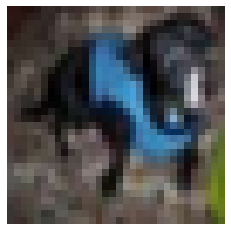

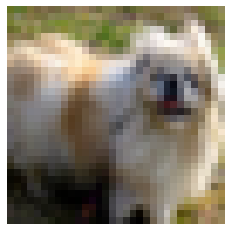

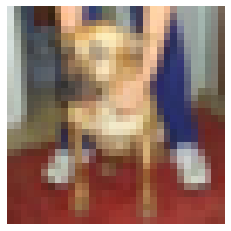

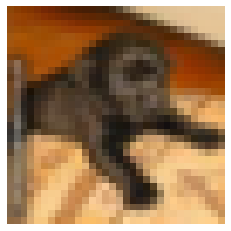

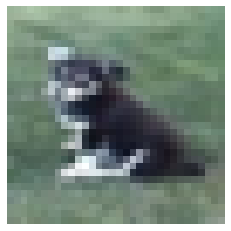

In [31]:
# render first 5 images from df_dog
for i in range(5):
    plt.imshow(df_dog['image'][i])
    plt.axis('off')
    plt.show()

In [32]:
# add 5000 more images to the df_dog dataframe from other labels
count = 0
for i in range(10000):
    # if i is from dog_index then skip it
    if i in dog_index:
        continue
    # if count is 5000 then break
    if count == 5000:
        break

    else:
        df_dog = df_dog.append({'image': df_combined[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
        count += 1

In [33]:
# check the shape of the new dataframe
df_dog.shape

(10000, 2)

In [34]:
# check label counts
df_dog['labels'].value_counts()

5    5000
6     580
8     570
9     568
2     568
4     567
0     559
7     540
3     540
1     508
Name: labels, dtype: int64

In [35]:
df_dog.tail()


,image,labels
9995,"[[[161, 150, 139], [167, 152, 135], [166, 152,...",2
9996,"[[[66, 56, 57], [75, 64, 62], [88, 75, 71], [8...",9
9997,"[[[170, 180, 189], [169, 179, 188], [169, 179,...",0
9998,"[[[102, 101, 100], [103, 102, 101], [107, 106,...",3
9999,"[[[92, 113, 137], [93, 114, 138], [92, 111, 13...",2


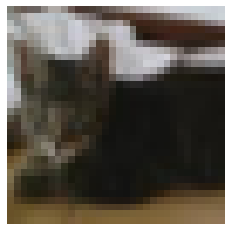

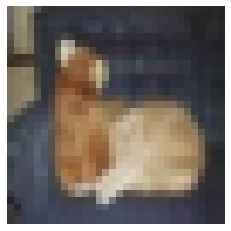

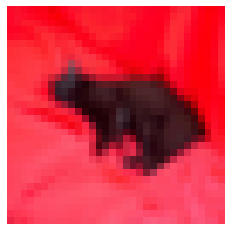

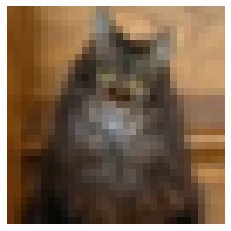

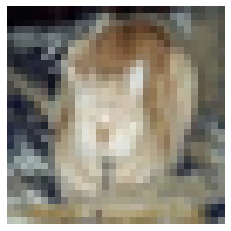

In [36]:
# loop through dataframe and render 5 images from label 3
count = 0
for i in df_dog.index:
    if count == 5:
        break
    if df_dog['labels'][i] == 3:
        plt.imshow(df_dog['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

In [37]:
# make a new dataframe for the test data
df_test = pd.DataFrame()

In [38]:
# reshape test_df to 32x32x3
test_df = test_df.values.reshape(-1, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [39]:
# add 1000 images from test_df that have label 5 to df_test
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] == 5:
        df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1


In [40]:
test_df.shape

(10000, 32, 32, 3)

In [41]:
df_test.shape

(1000, 2)

In [42]:
# add 1000 images from test_df that do not have the label 5 to df_test
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] != 5:
        df_test = df_test.append({'image': test_df[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1

In [43]:
df_test.shape

(2000, 2)

In [44]:
# check label counts
df_test['labels'].value_counts()

5    1000
6     130
0     119
3     115
9     115
8     114
7     106
2     106
1      99
4      96
Name: labels, dtype: int64

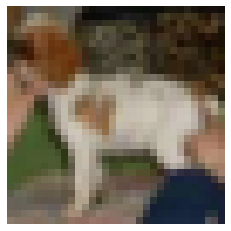

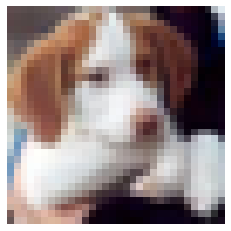

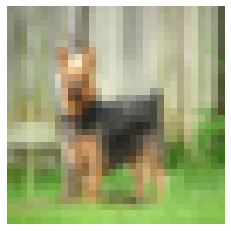

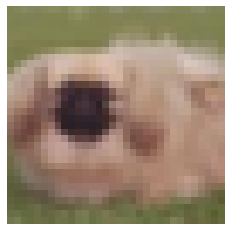

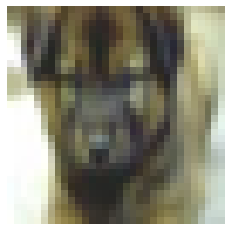

In [45]:
# render 5 images from label 5
count = 0
for i in df_test.index:
    if count == 5:
        break
    if df_test['labels'][i] == 5:
        plt.imshow(df_test['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

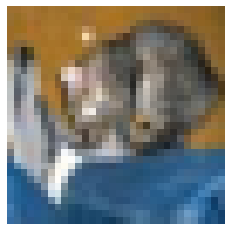

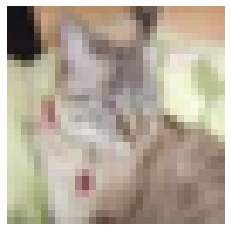

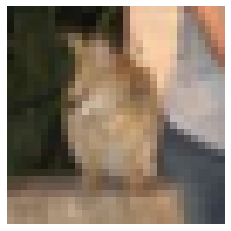

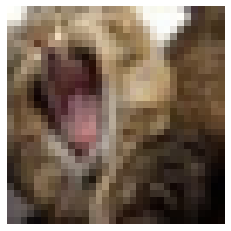

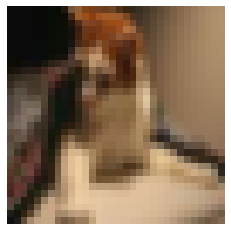

In [46]:
# render 5 images from label 3
count = 0
for i in df_test.index:
    if count == 5:
        break
    if df_test['labels'][i] == 3:
        plt.imshow(df_test['image'][i])
        plt.axis('off')
        plt.show()
        count += 1

## Data Modelling

In [47]:
# df_dog label count
df_dog['labels'].value_counts()

5    5000
6     580
8     570
9     568
2     568
4     567
0     559
7     540
3     540
1     508
Name: labels, dtype: int64

In [48]:
df_dog.tail()

,image,labels
9995,"[[[161, 150, 139], [167, 152, 135], [166, 152,...",2
9996,"[[[66, 56, 57], [75, 64, 62], [88, 75, 71], [8...",9
9997,"[[[170, 180, 189], [169, 179, 188], [169, 179,...",0
9998,"[[[102, 101, 100], [103, 102, 101], [107, 106,...",3
9999,"[[[92, 113, 137], [93, 114, 138], [92, 111, 13...",2


In [49]:
# in df_dog change all label 5's 1 meaning it is a dog and all other labels 0 meaning it is not a dog
df_dog['labels'] = df_dog['labels'].apply(lambda x: 1 if x == 5 else 0)

In [50]:
# in df_test change all label 5's 1 meaning it is a dog and all other labels 0 meaning it is not a dog
df_test['labels'] = df_test['labels'].apply(lambda x: 1 if x == 5 else 0)

In [51]:
df_dog.head()

,image,labels
0,"[[[45, 20, 19], [42, 21, 18], [35, 17, 13], [3...",1
1,"[[[101, 114, 35], [94, 116, 48], [98, 112, 42]...",1
2,"[[[213, 221, 221], [119, 127, 122], [58, 71, 8...",1
3,"[[[141, 70, 8], [139, 61, 2], [136, 55, 0], [1...",1
4,"[[[154, 179, 152], [159, 183, 157], [165, 189,...",1


In [52]:
df_test.head()

,image,labels
0,"[[[91, 64, 30], [82, 58, 30], [87, 73, 59], [8...",1
1,"[[[95, 76, 78], [92, 77, 78], [89, 77, 77], [8...",1
2,"[[[136, 134, 118], [142, 141, 126], [149, 150,...",1
3,"[[[127, 130, 81], [130, 133, 88], [135, 137, 9...",1
4,"[[[118, 113, 81], [122, 117, 83], [116, 104, 7...",1


In [53]:
df_test.tail()

,image,labels
1995,"[[[134, 85, 52], [118, 82, 45], [123, 82, 50],...",0
1996,"[[[183, 199, 202], [184, 199, 203], [187, 202,...",0
1997,"[[[179, 198, 218], [172, 190, 210], [171, 189,...",0
1998,"[[[255, 255, 255], [254, 254, 254], [255, 255,...",0
1999,"[[[140, 163, 151], [136, 162, 152], [127, 155,...",0


In [54]:
# check label counts
df_test['labels'].value_counts()

1    1000
0    1000
Name: labels, dtype: int64

In [55]:
# split the df_dog dataframe into x_train and y_train
x_train = df_dog['image']
y_train = df_dog['labels']

In [56]:
# split the df_test dataframe into X_test and y_test
X_test = df_test['image']
y_test = df_test['labels']

In [57]:
# check data types
print(type(x_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [58]:
print(x_train[0].shape)

(32, 32, 3)


In [59]:
def convert_to_array(data):
    image_lst = []
    for i in range(len(data)):
        image_lst.append(np.array(data[i]))
    return image_lst

In [60]:
x_train = convert_to_array(x_train)

In [61]:
x_train = np.array(x_train)

In [62]:
X_test = convert_to_array(X_test)

In [63]:
X_test = np.array(X_test)

In [64]:
X_test.shape

(2000, 32, 32, 3)

In [65]:
x_train.shape

(10000, 32, 32, 3)

In [66]:
df_dog['image'].shape

(10000,)

In [67]:
df_dog['image'].iloc[0]

array([[[ 45,  20,  19],
        [ 42,  21,  18],
        [ 35,  17,  13],
        ...,
        [ 93,  86,  81],
        [ 51,  47,  42],
        [ 39,  36,  32]],

       [[ 46,  22,  20],
        [ 42,  22,  18],
        [ 40,  22,  18],
        ...,
        [105,  93,  92],
        [ 66,  53,  52],
        [ 48,  39,  36]],

       [[ 43,  22,  19],
        [ 40,  21,  17],
        [ 48,  32,  27],
        ...,
        [ 88,  74,  77],
        [ 77,  59,  60],
        [ 58,  44,  43]],

       ...,

       [[ 55,  54,  51],
        [ 67,  57,  54],
        [ 73,  64,  57],
        ...,
        [ 93,  87,  49],
        [101, 116,  34],
        [103, 123,  30]],

       [[ 55,  54,  51],
        [ 62,  53,  50],
        [ 68,  59,  52],
        ...,
        [ 69,  62,  38],
        [ 81,  93,  29],
        [ 99, 117,  35]],

       [[ 58,  53,  51],
        [ 59,  46,  44],
        [ 58,  45,  40],
        ...,
        [ 77,  68,  53],
        [ 66,  75,  29],
        [ 83,  99,  31]]

In [68]:
df_dog['image'].iloc[0].shape

(32, 32, 3)

In [69]:
x_train.shape

(10000, 32, 32, 3)

In [70]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [132]:
def generateModel(hp=None):
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    #Adding convolutional layers
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    # model.add(layers.Conv2D(32, (3,3), activation="relu"))
    # model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Flatten())
    # model.add(layers.Dense(32, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    # model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(64, activation="relu")) # Example Hidden Layer 2. Has 20 Nodes.
    # model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(128, activation="relu")) # Example Hidden Layer 2. Has 40 Nodes.

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss=losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [72]:
generateModel().summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 Output_Probability (Dense)  (None, 1)                 129       
                                           

In [86]:
model = generateModel()

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(x_train, y_train,
          validation_data=(X_test, y_test),
          epochs=50000,
          batch_size=1000, # Set this to a lower number if your computer spec is bad.
          callbacks=[tensorboard_callback, earlystop_callback],
          # verbose=0 # Uncomment this line to reduce the printing on console.
          )

Epoch 1/50000
10/10 [==============================] - 5s 470ms/step - loss: 0.6471 - accuracy: 0.6135 - val_loss: 0.6119 - val_accuracy: 0.6525
Epoch 2/50000
10/10 [==============================] - 5s 496ms/step - loss: 0.6026 - accuracy: 0.6555 - val_loss: 0.5846 - val_accuracy: 0.6715
Epoch 3/50000
10/10 [==============================] - 5s 466ms/step - loss: 0.5798 - accuracy: 0.6823 - val_loss: 0.5648 - val_accuracy: 0.6915
Epoch 4/50000
10/10 [==============================] - 4s 396ms/step - loss: 0.5595 - accuracy: 0.7019 - val_loss: 0.5506 - val_accuracy: 0.7190
Epoch 5/50000
10/10 [==============================] - 4s 411ms/step - loss: 0.5434 - accuracy: 0.7143 - val_loss: 0.5379 - val_accuracy: 0.7265
Epoch 6/50000
10/10 [==============================] - 5s 475ms/step - loss: 0.5307 - accuracy: 0.7275 - val_loss: 0.5271 - val_accuracy: 0.7395
Epoch 7/50000
10/10 [==============================] - 4s 397ms/step - loss: 0.5184 - accuracy: 0.7336 - val_loss: 0.5171 - val_ac

In [78]:
from tensorflow.keras.models import load_model

In [74]:
# save model
model.save('model.h5')

In [79]:
# load model
# model = load_model('model.h5')

In [84]:
model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               1843328   
                                                                 
 Output_Probability (Dense)  (None, 1)                 129       
                                           

# Introduction

I picked label 5 because it was a dog and I thought it would be a good challenge to try and get the model to recognise if there is a dog in the image or not.

# Model Process

I started off by creating a function to convert the images into arrays. I then split the data into x_train and y_train and X_test and y_test. I then created a function to create the model. I then created a log directory and set up the callbacks.

The shape of my model contains 1 Conv layer with 64 filters, 1 MaxPooling layer, 1 Flatten layer, 1 Dense layer with 128 nodes and 1 Dense layer with 1 node. I used the Adam optimizer with a learning rate of 0.0001 and the BinaryCrossentropy loss function. I used the accuracy metric. I trained the model for 50000 epochs with a batch size of 1000. I used the TensorBoard callback and the EarlyStopping callback.

# Model Performance

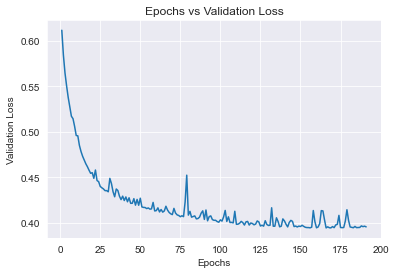

In [87]:
# plot epochs vs valiadtion loss
plt.plot(range(1, len(model.history.history['val_loss'])+1), model.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Epochs vs Validation Loss')
plt.show()

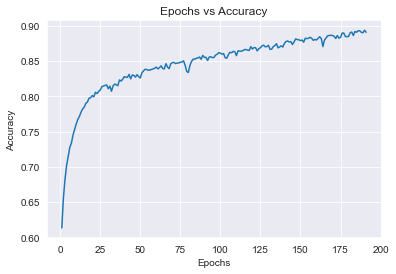

In [89]:
# plot Accuracy against every epoch
plt.plot(range(1, len(model.history.history['accuracy'])+1), model.history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

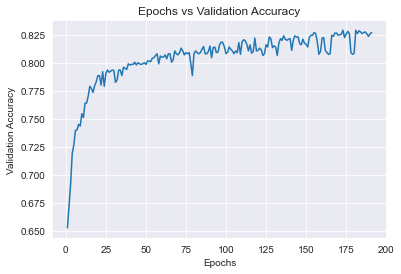

In [90]:
# plot validation Accuracy against every epoch
plt.plot(range(1, len(model.history.history['val_accuracy'])+1), model.history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Epochs vs Validation Accuracy')
plt.show()

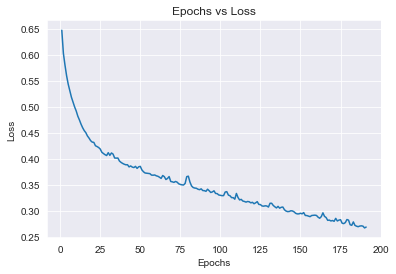

In [91]:
# plot loss against every epoch
plt.plot(range(1, len(model.history.history['loss'])+1), model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

# Conclusion

# References

1. [Learning Multiple Layers of Features from Tiny Images](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.

# Advance Features

## Takes and image resizes it 32x32 and runs it through the model

In [93]:
from PIL import Image

In [110]:
def evaluateimage(image):
    """
    Evaluate the image using the model.
    """
    image = image.resize((32,32), Image.ANTIALIAS)
    image = np.array(image)
    image = image[:,:,:3]
    image = image.reshape(32, 32, 3)
    return model.predict(np.array([image]))

In [111]:
# load the image from image folder
image = Image.open('image/jordandisc profile.png')

In [112]:
# evaluate the image
evaluateimage(image)

1/1 [==============================] - 0s 155ms/step


array([[0.83260095]], dtype=float32)

## Hyperparameter Tuning

In [149]:
import keras_tuner as kt

In [162]:
tuner = kt.RandomSearch(
    generateModel,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='final')

In [163]:
tuner.search(x_train, y_train,
             epochs=191,
             validation_data=(X_test, y_test))

Trial 1 Complete [00h 17m 36s]
val_accuracy: 0.8314999938011169

Best val_accuracy So Far: 0.8314999938011169
Total elapsed time: 00h 17m 36s
INFO:tensorflow:Oracle triggered exit


In [164]:
# find best possible model compilation parameters for accuracy
best_hps=tuner.get_best_hyperparameters(num_trials=5)

In [165]:
best_model = tuner.get_best_models()[0]

In [166]:
best_model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 Output_Probability (Dense)  (None, 1)                 129       
                                           

In [167]:
# create model with best parameters
new_model = tuner.hypermodel.build(best_hps)

In [168]:
# train model with best parameters
new_model.fit(x_train, y_train,
          validation_data=(X_test, y_test),
          epochs=191,
          batch_size=1000, # Set this to a lower number if your computer spec is bad.
          callbacks=[tensorboard_callback, earlystop_callback],
          # verbose=0 # Uncomment this line to reduce the printing on console.
          )

Epoch 1/191
10/10 [==============================] - 5s 429ms/step - loss: 0.6549 - accuracy: 0.6192 - val_loss: 0.6209 - val_accuracy: 0.6580
Epoch 2/191
10/10 [==============================] - 4s 468ms/step - loss: 0.6106 - accuracy: 0.6580 - val_loss: 0.5954 - val_accuracy: 0.6640
Epoch 3/191
10/10 [==============================] - 3s 353ms/step - loss: 0.5883 - accuracy: 0.6755 - val_loss: 0.5756 - val_accuracy: 0.6910
Epoch 4/191
10/10 [==============================] - 4s 387ms/step - loss: 0.5695 - accuracy: 0.6985 - val_loss: 0.5596 - val_accuracy: 0.7135
Epoch 5/191
10/10 [==============================] - 4s 383ms/step - loss: 0.5513 - accuracy: 0.7141 - val_loss: 0.5448 - val_accuracy: 0.7220
Epoch 6/191
10/10 [==============================] - 3s 355ms/step - loss: 0.5363 - accuracy: 0.7239 - val_loss: 0.5312 - val_accuracy: 0.7360
Epoch 7/191
10/10 [==============================] - 4s 362ms/step - loss: 0.5191 - accuracy: 0.7379 - val_loss: 0.5175 - val_accuracy: 0.7445

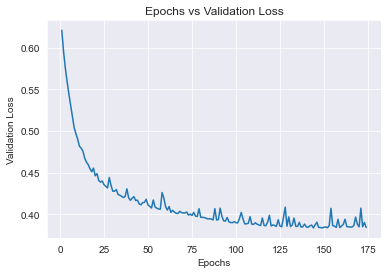

In [169]:
# plot epochs vs valiadtion loss
plt.plot(range(1, len(new_model.history.history['val_loss'])+1), new_model.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Epochs vs Validation Loss')
plt.show()